# Resource Catalog

This notebook demostrates usage of the EODH resource catalog API using `pyeodh`.

EODH provides STAC API, which you can search and use it to retrieve catalogs, collections, items or assets. This client can be used to fetch both public datasets and also private from user specific workspaces.


First we need to instantiate the pyeodh client and get the resouce catalog entrypoint (root catalog).


In [1]:
import pyeodh

client = pyeodh.Client(
    base_url="https://staging.eodatahub.org.uk"
)  # Optionally specify a different server
service = client.get_catalog_service()

There can be many catalogs nested within other catalogs. You can either fetch all catalogs using `get_catalogs()` and iterate over the resulting list or fetch a specific catalog using it's ID (path from the root catalog, if the catalog is nested in another one) in `get_catalog()`. See the [web UI](https://test.eodatahub.org.uk/catalogue) to gain more insight into the resource catalog structure.


In [5]:
catalogs = service.get_catalogs()
ceda_cat = service.get_catalog("public/catalogs/ceda-stac-catalogue")


For all types of records, all attributes are mapped to class properties and can be accessed as shown below. See [pyeodh documentation](https://pyeodh.readthedocs.io) or use your editor's intellisense to find available properties. Let's see what catalogs are currently available to us.


In [9]:
for cat in catalogs:
    print("id: ", cat.id)
    print("title: ", cat.title)
    print("description: ", cat.description)
    print("")

id:  airbus
title:  
description:  Airbus Datasets

id:  airbus
title:  
description:  Airbus Datasets

id:  airbus_phr_qa
title:  
description:  Root catalog for airbus_phr QA checks

id:  cat_0721004e-fe8a-11ef-a4fd-925b27b1cd31
title:  EOCIS Monthly Land Surface Temperature (LST) Catalog for Sentinel-3
description:  This catalog contains monthly Land Surface Temperature (LST) collections derived from SLSTR sensors on Sentinel-3A and Sentinel-3B satellites. Data are split into daytime and nighttime observations, composited at a 0.01-degree resolution.

id:  cat_331a1512-04db-11f0-a0a6-eadd75232b79
title:  ESACCI Land Surface Temperature (LST) data for London 100m resolution
description:  This catalog contains level L2P land surface temperatures derived from Landsat 8 for London at 100m resolution.

id:  ceda-stac-catalogue
title:  CEDA STAC API
description:  This is an experimental STAC API server.
The content is subject to change the and there is no guarantee surrounding its uptime.

Catalogs can hold other catalogs or collections, let's grab a collection from a catalog. Again we can either fetch all collections using `Catalog.get_collections()` or in this case a specific one identified by it's ID.


In [10]:
cmip6 = ceda_cat.get_collection("cmip6")

We can grab all items from a collection using `Collection.get_items()` or a specific one using `Collection.get_item()` if we know it's ID.


In [11]:
item = cmip6.get_item(
    "CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806"
)
print(item.id)

CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806


`Collection.get_items()` does not actually fetch all items at once, it uses a generator to lazy load items one page at a time. Paginated responses can be simply iterated over like so.

Note: `total_count` is sometimes not provided by the api, which will result only in a warning when accessed.


In [13]:
items = cmip6.get_items()
print(items.total_count)
for item in items[:15]:
    print(item.id)

6215
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rlus.gr.v20200806
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg.piControl.r1i1p1f1.Amon.clivi.gr.v20210419
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp126.r1i1p1f1.day.uas.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.rsds.gn.v20210318
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.hurs.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.tas.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.psl.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.Amon.tasmin.gn.v20210318
CMIP6.ScenarioMIP.NCAR.CESM2-WACCM.ssp585.r1i1p1f1.day.tasmin.gn.v20200

If we know the URL of a specific Item/Collection/Catalog, we can directly initialize the object from the URL using `from_href()` class method, which is available for all classes representing EODH API objects.


In [19]:
from pyeodh.resource_catalog import Item

item = Item.from_href(
    client,
    "https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/public/catalogs/stac-fastapi/collections/sentinel2_ard/items/neodc.sentinel_ard.data.sentinel_2.2025.01.21.S2B_20250121_latn555lonw0037_T30UVG_ORB080_20250121132507_utm30n_osgb",
)
print(item.id)

neodc.sentinel_ard.data.sentinel_2.2025.01.21.S2B_20250121_latn555lonw0037_T30UVG_ORB080_20250121132507_utm30n_osgb


The API provides a ping endpoint, which we can use to for a cheap livecheck.


In [20]:
print(f"Livecheck: PING-{service.ping()}")

Livecheck: PING-PONG


We can check specifications the API claims confromance to, either by calling `CatalogService.get_conformance()` (makes request to conformance endpoint) or accessing property `Catalog.conforms_to` (uses stored data provided by API when fetching a catalog).


In [21]:
print("API conforms to:", *service.get_conformance(), sep="\n")

API conforms to:
http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/filter
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core
https://api.stacspec.org/v1.0.0/core
https://api.stacspec.org/v1.0.0-rc.2/item-search#filter
http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/features-filter
https://api.stacspec.org/v1.0.0/item-search#fields
https://api.stacspec.org/v0.3.0/aggregation
https://api.stacspec.org/v1.0.0/item-search#query
http://www.opengis.net/spec/cql2/1.0/conf/advanced-comparison-operators
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson
https://api.stacspec.org/v1.0.0/ogcapi-features
https://api.stacspec.org/v1.0.0/item-search#sort
http://www.opengis.net/spec/cql2/1.0/conf/basic-cql2
https://api.stacspec.org/v1.0.0-rc.1/item-search#free-text
https://api.stacspec.org/v1.0.0-rc.1/collection-search#free-text
http://www.opengis.net/spec/ogcapi-common-2/1.0/conf/simple-query
https://api.stacspec.org/v1.0.0/item-search
http://www.opengis.net/spec/ogcap

To avoid iterating over catalogs, collections and items in search of a specific item, use `Catalog.search()`.

Note: `CatalogService` is an extension of `Catalog` class, therefore this method is available for both. See neighbouring ceda-rc.ipynb notebook for more advanced search uses.


In [23]:
for result in service.search(
    collections=["cmip6"], catalog_paths=["public/catalogs/stac-fastapi"]
)[:10]:
    print(result.id)

CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rlus.gr.v20200806
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rlus.gr.v20200806
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg.piControl.r1i1p1f1.Amon.clivi.gr.v20210419
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg.piControl.r1i1p1f1.Amon.clivi.gr.v20210419
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp126.r1i1p1f1.day.uas.gn.v20210318
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp126.r1i1p1f1.day.uas.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.pr.gn.v20210317


The resouce catalog client is based on the [PySTAC library](https://github.com/stac-utils/pystac). All attributes provided by the API are mapped to class properties and can be easily accessed as shown at the top of this notebook. In case you want to utilize some functionality from pystac which is not directly available in pyeodh classes, you can access the underlying PySTAC object using `_pystac_object` attribute. For example dump an item into a plain dictionary.


In [29]:
import json

jsonstring = json.dumps(item._pystac_object.to_dict())
print(jsonstring)

{"type": "Feature", "stac_version": "1.0.0", "id": "CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317", "properties": {"datetime": "2251-01-01T00:00:00Z", "start_datetime": "2201-01-01T12:00:00Z", "end_datetime": "2300-12-31T12:00:00Z", "access": ["HTTPServer"], "index_node": null, "latest": true, "pid": null, "replica": false, "retracted": false, "instance_id": "CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317", "citation_url": "http:/cera-www.dkrz.de/WDCC/meta/CMIP6/CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317.json", "variable_long_name": "Daily Minimum Near-Surface Air Temperature", "variable_units": "K", "cf_standard_name": "air_temperature", "activity_id": "ScenarioMIP", "data_specs_version": "01.00.30", "experiment_title": "update of RCP2.6 based on SSP1", "frequency": "day", "further_info_url": "https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARCCSS.ACCESS-CM2.ssp126.none.r1i1p1f1", 

In [25]:
# number of collections in each catalog
cat_stats = {}
for cat in catalogs:
    cat_stats[cat.id] = len(cat.get_collections())

print(cat_stats)

col_stats = {}
for col in service.get_collections():
    print(col.id, col.get_items().total_count)
    col_stats[col.id] = col.get_items().total_count or 0
print(col_stats)

{'airbus': 4, 'airbus_phr_qa': 2, 'cat_0721004e-fe8a-11ef-a4fd-925b27b1cd31': 4, 'cat_331a1512-04db-11f0-a0a6-eadd75232b79': 1, 'ceda-stac-catalogue': 10, 'commercial': 6, 'earth-search-aws': 1, 'minimalist-stac': 9, 'npl': 6}
wcrp 0
ukcp 180
ukcp 180
sentinel2_ard 23068


`numMatched` number is not in the response.


sentinel2_ard 23068
sentinel1_ard 219
sentinel1_ard 219


`numMatched` number is not in the response.


sentinel1 None
qa_radiometric 11
qa_radiometric 11
{'wcrp': 0, 'ukcp': 180, 'sentinel2_ard': 0, 'sentinel1_ard': 219, 'sentinel1': 17346, 'qa_radiometric': 11}


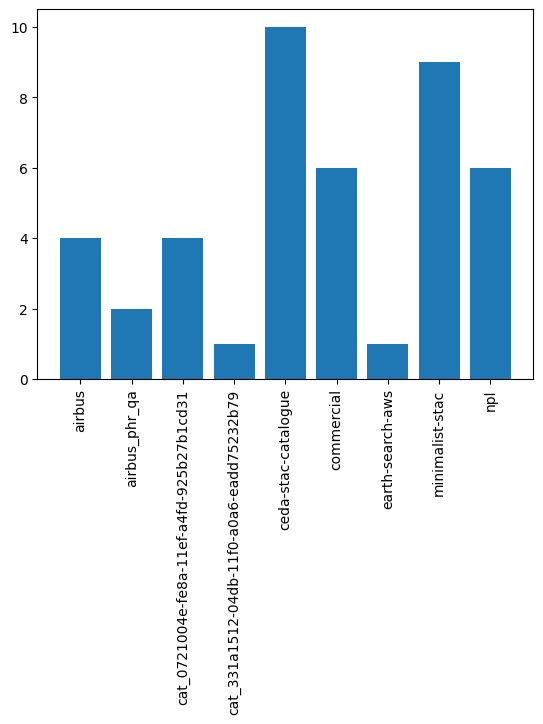

In [26]:
import matplotlib.pyplot as plt

plt.bar(cat_stats.keys(), cat_stats.values())
plt.xticks(rotation=90)
plt.show()

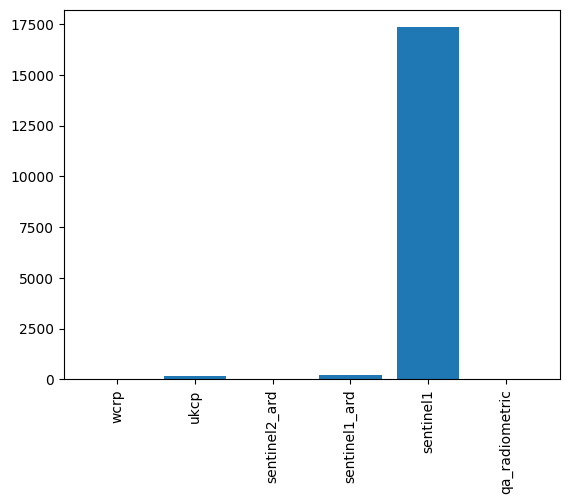

In [27]:
plt.bar(col_stats.keys(), col_stats.values())
plt.xticks(rotation=90)
plt.show()

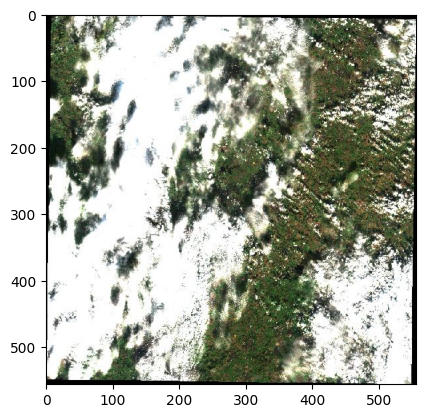

In [24]:
sentinel2ard_item = ceda_cat.get_collection("sentinel2_ard").get_item(
    "neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn519lonw0022_T30UWC_ORB037_20231120132420_utm30n_osgb"
)
image_url = sentinel2ard_item.assets["thumbnail"].href

import matplotlib.pyplot as plt
import urllib
import numpy as np
from PIL import Image

# Some magic using pillow and urllib to open the remote jpg as a file handle in memory
image = np.array(Image.open(urllib.request.urlopen(image_url)))

plt.imshow(image)

# Commercial data ordering

For specific catalogs, you can order commercial data using the `Item.commercial_data_order()` method.

The ordering process will create a new item and collection within a workspace with an order status, and execute a workflow to order the item from a commercial data provider.

The following parameters are supported:

- workspace: The workspace to order the data from. Defaults to the username pyeodh client was initialized with.
- product_bundle: The product bundle to order from the commercial data provider
- aoi: (Optional) Coordinates to limit the AOI of the item for purchase where possible. Given in the same nested format as STAC
- extra_data: (Optional) A placeholder for future data options to include in the item

In the below example, we first fetch an item from the airbus catalog, then call the `commercial_data_order` method to order the data.

_Note that calling this method might imply a charge to your account, please check with your account manager for more details._


In [ ]:
client.get_catalog_service().get_catalog("commercial/catalogs/airbus").get_collection(
    "airbus_sar_data"
).get_items()[0].commercial_data_order(product_bundle="general_use")